In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
moltean_fruits_path = kagglehub.dataset_download('moltean/fruits')

print('Data source import complete.')


100%|██████████| 964M/964M [00:43<00:00, 23.0MB/s]

Extracting files...


Data source import complete.


<a id = '1'></a>
## Import Libraries
We will use to keras library and keras models.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import MaxPooling2D,Conv2D,Activation,Dropout,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
import matplotlib.pyplot as plt
from glob import glob
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
print(os.listdir("/root/.cache/kagglehub/datasets/moltean"))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

['fruits']


<a id = '2'></a>
## Load and Check Data
Fruits dataset has a train images and test images so we assign to variables this images.After we check to a image and show.



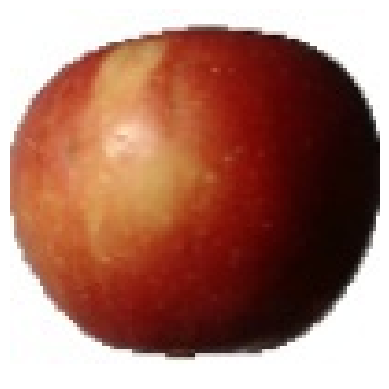

In [ ]:
train_path=("/root/.cache/kagglehub/datasets/moltean/fruits/versions/11/fruits-360_dataset_100x100/fruits-360/Training" )
test_path=("/root/.cache/kagglehub/datasets/moltean/fruits/versions/11/fruits-360_dataset_100x100/fruits-360/Test" )
img=load_img(train_path+"/Apple Braeburn 1/0_100.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()


<a id = '3'></a>
## Find Number of Classes and Image Size
We need to find image size and number of classes because will use for the model in the future.

In [ ]:
x=img_to_array(img)
print(x.shape)
className=glob(train_path+'/*')
numberOfClass=len(className)
print(numberOfClass)

(100, 100, 3)
141


In [ ]:
model=Sequential() #Sequential is skleton for the cnn than we can add layers this skeleton.
model.add(Conv2D(32,(3,3),activation ='relu', input_shape = x.shape))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),activation ='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3),activation ='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
#Add to ann model.
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass,activation="softmax"))

model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])
batch_size=32

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       6,554,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 141)                 │         144,525 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,727,789 (25.66 MB)

 Trainable params: 6,727,789 (25.66 MB)

 Non-trainable params: 0 (0.00 B)

<a id = '14'></a>
## Image Data Generator
Let's imagine.You have some data but it's not enough to train models.What will you do? There is a function in keras for this problem.

ImageDataGenerator function performs functions such as zoom in zoom out rotate your data and now you have more data.

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                zoom_range=0.3,
                                horizontal_flip=True,
                                rotation_range=0.3)
test_datagen=ImageDataGenerator(rescale=1./255)

<a id = '15'></a>
## Flow From Directory
How do you add your images that in the file ? Keras library has a function for this.If you organize your images according to class keras can choose that images by class.We use flow_from_directory for this.

In [ ]:
train_generator=train_datagen.flow_from_directory(train_path,
                                                 target_size=x.shape[:2],
                                                 batch_size=batch_size,
                                                 color_mode="rgb",
                                                 class_mode="categorical")
test_generator=test_datagen.flow_from_directory(test_path,
                                                 target_size=x.shape[:2],
                                                 batch_size=batch_size,
                                                 color_mode="rgb",
                                                 class_mode="categorical")

Found 70491 images belonging to 141 classes.
Found 23619 images belonging to 141 classes.


<a id = '16'></a>
## Fit the Model
While we are fitting the model we have to arrange some hyperparameter.These are epochs,steps_per_epoch and validation_steps.

steps_per_epoch:Number of iteration to be trained in each epoch.
validation_steps:Number of iteration to be tested in each epoch.

In [ ]:
hist=model.fit(train_generator,
                   steps_per_epoch=3200//batch_size,
                   epochs=100,
                   validation_data=test_generator,
                   validation_steps=1600//batch_size)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 116ms/step - accuracy: 0.0245 - loss: 4.7709 - val_accuracy: 0.0931 - val_loss: 3.6565
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - accuracy: 0.1247 - loss: 3.5401 - val_accuracy: 0.3913 - val_loss: 2.2115
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.3134 - loss: 2.4651 - val_accuracy: 0.4569 - val_loss: 1.8742
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.4624 - loss: 1.7993 - val_accuracy: 0.4913 - val_loss: 1.5962
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 200ms/step - accuracy: 0.5699 - loss: 1.3756 - val_accuracy: 0.7038 - val_loss: 0.9459
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - accuracy: 0.6430 - loss: 1.1867 - val_accuracy: 0.7325 - val_loss: 0.8332
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 194ms/step - accuracy: 0.7217 - loss: 0.8724 - val_accuracy: 0.7319 - val_loss: 0.8401
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.7709 - l

<a id = '17'></a>
## Save Results
We need to save to results for use in the future.First,we save to weight values.

In [ ]:
model.save_weights("Save_weights.weights.h5")

Than we save to accuracy and lose values.

In [ ]:
import json
with open("Save_accu&lose.json","w") as s:
    json.dump(hist.history,s)



We write to values that saved in the past.

In [ ]:
import codecs
with codecs.open("Save_accu&lose.json","r",encoding="utf-8") as s:
    h=json.loads(s.read())


<a id = '18'></a>
## Visualization of Results

In [ ]:
print(h.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


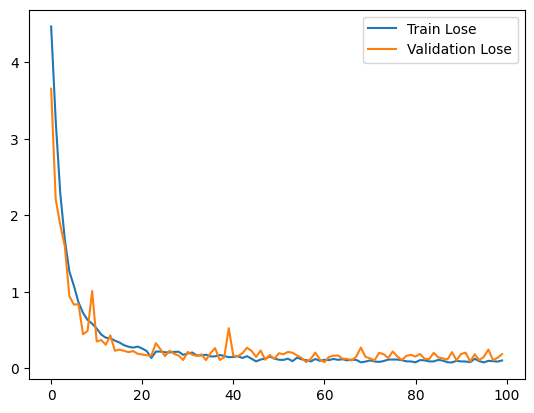

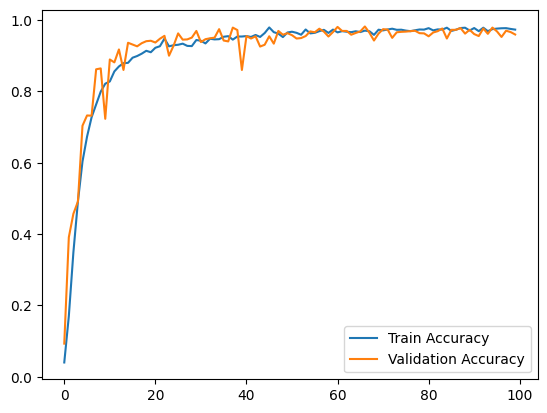

In [ ]:
plt.plot(h["loss"],label="Train Lose")
plt.plot(h["val_loss"],label="Validation Lose")
plt.legend()
plt.show()
plt.figure()
plt.plot(h["accuracy"],label="Train Accuracy")
plt.plot(h["val_accuracy"],label="Validation Accuracy")
plt.legend()
plt.show()

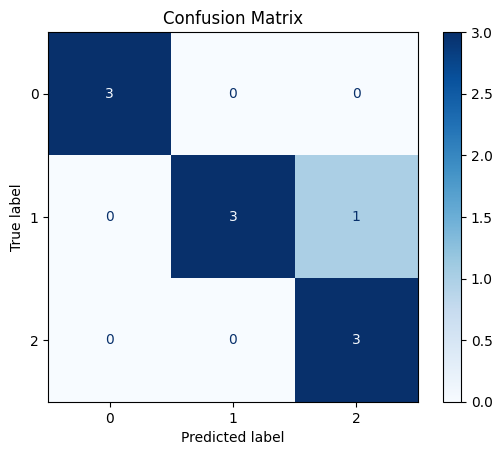

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sample ground truth and predicted labels for illustration
true_labels = [1, 0, 1, 2, 0, 1, 2, 2, 0, 1]
predicted_labels = [1, 0, 2, 2, 0, 1, 2, 2, 0, 1]

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(true_labels))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


<a id = '19'></a>
## Outcomes
CNN model is the most frequently used model today in training models for images. It is possible to obtain results above 99% accuracy with the correct hyperparameter values.

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 96.28%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


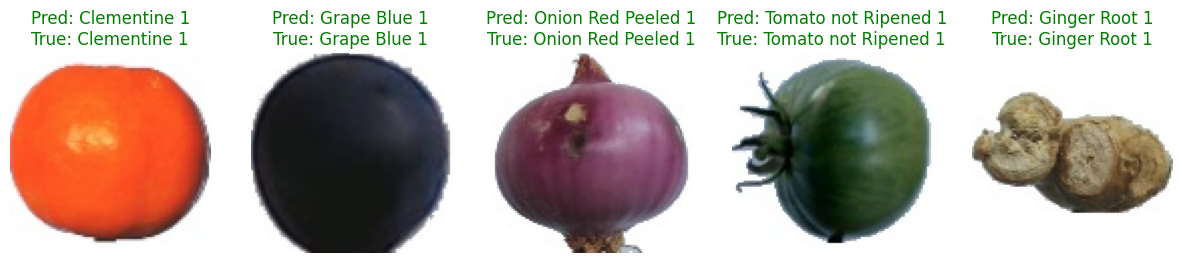

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def predict_from_test_set(test_generator, model):
    # Get a batch of test images and labels
    images, labels = next(test_generator)

    # Predict classes for the batch of images
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(labels, axis=1)

    # Get class labels
    class_indices = test_generator.class_indices
    class_labels = {v: k for k, v in class_indices.items()}

    # Plot the first 5 test images with their predicted and true labels
    plt.figure(figsize=(15, 5))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
        pred_label = class_labels[predicted_classes[i]]
        true_label = class_labels[true_classes[i]]
        color = 'green' if pred_label == true_label else 'red'
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.show()

# Predict and visualize test results
predict_from_test_set(test_generator, model)


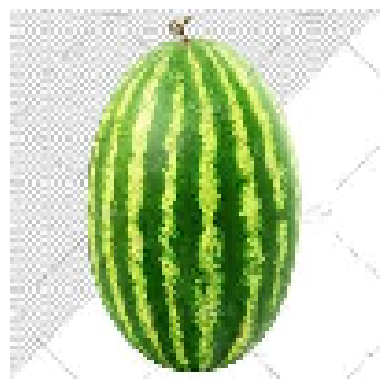

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted Class: Watermelon 1


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def predict_new_image(image_path, model):
    # Load the image
    img = load_img(image_path, target_size=(100, 100))  # Ensure the image size matches the model input
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Preprocess the image
    img_array = img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)

    # Show the predicted class label
    class_indices = train_generator.class_indices
    class_labels = {v: k for k, v in class_indices.items()}  # Reverse the dictionary
    predicted_label = class_labels[predicted_class[0]]

    print(f"Predicted Class: {predicted_label}")

# Example usage:
predict_new_image("/content/download1.jpg", model)


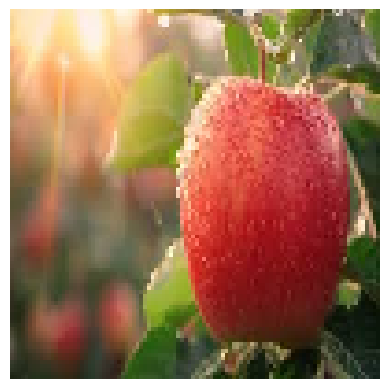

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Class: Apple Pink Lady 1


In [ ]:

# Example usage:
predict_new_image("/content/images.jpg", model)